In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from htools import ends

In [4]:
pd.DataFrame.ends = ends
pd.Series.ends = ends

In [528]:
df = pd.read_csv('data/fights_merged.csv', parse_dates=['event_date'])
df.tail(3)

,pageurl,eid,mid,event_name,event_org,event_date,event_place,f1pageurl,f2pageurl,f1name,...,ref,round,time,location,name_1,locality_1,country_1,name_2,locality_2,country_2
3601,/events/UFC-Fight-Night-83-Cerrone-vs-Oliveira...,47935,3,UFC Fight Night 83 - Cerrone vs. Oliveira,Ultimate Fighting Championship,2016-02-21,"Consol Energy Center, Pittsburgh, Pennsylvania...",/fighter/Ashlee-EvansSmith-75021,/fighter/Marion-Reneau-61266,Ashlee Evans-Smith,...,James Chappell,3,5:00,"Pittsburgh, Pennsylvania, United States",Ashlee Evans-Smith,"Lake Forest, California",United States,Marion Reneau,"Visalia, California",United States
3602,/events/UFC-Fight-Night-83-Cerrone-vs-Oliveira...,47935,2,UFC Fight Night 83 - Cerrone vs. Oliveira,Ultimate Fighting Championship,2016-02-21,"Consol Energy Center, Pittsburgh, Pennsylvania...",/fighter/Lauren-Murphy-66725,/fighter/Kelly-Faszholz-117453,Lauren Murphy,...,Bill Bookwalter,3,4:55,"Pittsburgh, Pennsylvania, United States",Lauren Murphy,"Anchorage, Alaska",United States,Kelly Faszholz,"Santa Rosa, California",United States
3603,/events/UFC-Fight-Night-83-Cerrone-vs-Oliveira...,47935,1,UFC Fight Night 83 - Cerrone vs. Oliveira,Ultimate Fighting Championship,2016-02-21,"Consol Energy Center, Pittsburgh, Pennsylvania...",/fighter/Shamil-Abdurakhimov-26808,/fighter/Anthony-Hamilton-58947,Shamil Abdurakhimov,...,Chip Snider,3,5:00,"Pittsburgh, Pennsylvania, United States",Shamil Abdurakhimov,"Makhachkala, Dagestan",Russia,Anthony Hamilton,"Seattle, Washington",United States


In [529]:
df.columns

Index(['pageurl', 'eid', 'mid', 'event_name', 'event_org', 'event_date',
       'event_place', 'f1pageurl', 'f2pageurl', 'f1name', 'f2name', 'f1result',
       'f2result', 'f1fid', 'f2fid', 'method', 'method_d', 'ref', 'round',
       'time', 'location', 'name_1', 'locality_1', 'country_1', 'name_2',
       'locality_2', 'country_2'],
      dtype='object')

In [530]:
method_map = dict(TKO='KO',
                  Draw='Decision',
                  NC='Other',
                  DQ='Other',
                  Technical='Other',
                  Submission='Submission',
                  Decision='Decision')

In [531]:
df['month'] = df.event_date.dt.month
df['year'] = df.event_date.dt.year
df.method.replace('^No.*', 'NC', regex=True, inplace=True)
df['simple_method'] = df.method.map(method_map)

In [532]:
def separate_event_place(col):
    vals = [arg.strip() for arg in col.split(',')]
    city = vals[1]
    if len(vals) == 4:
        state = vals[2]
    elif len(vals) == 3:
        state = None
    country = vals[-1]
    return city, state, country

In [533]:
locations = pd.DataFrame(df.event_place.apply(separate_event_place).tolist(), 
                         columns=['event_city', 'event_state', 
                                  'event_country'])
df = pd.concat([df, locations], axis=1)

In [534]:
df

,pageurl,eid,mid,event_name,event_org,event_date,event_place,f1pageurl,f2pageurl,f1name,...,country_1,name_2,locality_2,country_2,month,year,simple_method,event_city,event_state,event_country
0,/events/UFC-1-The-Beginning-7,7,8,UFC 1 - The Beginning,Ultimate Fighting Championship,1993-11-12,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Gerard-Gordeau-15,Royce Gracie,...,Brazil,Gerard Gordeau,The Hague,Netherlands,11,1993,Submission,Denver,Colorado,United States
1,/events/UFC-1-The-Beginning-7,7,7,UFC 1 - The Beginning,Ultimate Fighting Championship,1993-11-12,"McNichols Arena, Denver, Colorado, United States",/fighter/Jason-DeLucia-22,/fighter/Trent-Jenkins-23,Jason DeLucia,...,United States,Trent Jenkins,"Denver, Colorado",United States,11,1993,Submission,Denver,Colorado,United States
2,/events/UFC-1-The-Beginning-7,7,6,UFC 1 - The Beginning,Ultimate Fighting Championship,1993-11-12,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Ken-Shamrock-4,Royce Gracie,...,Brazil,Ken Shamrock,"San Diego, California",United States,11,1993,Submission,Denver,Colorado,United States
3,/events/UFC-1-The-Beginning-7,7,5,UFC 1 - The Beginning,Ultimate Fighting Championship,1993-11-12,"McNichols Arena, Denver, Colorado, United States",/fighter/Gerard-Gordeau-15,/fighter/Kevin-Rosier-17,Gerard Gordeau,...,Netherlands,Kevin Rosier,"Tampa, Florida",United States,11,1993,KO,Denver,Colorado,United States
4,/events/UFC-1-The-Beginning-7,7,4,UFC 1 - The Beginning,Ultimate Fighting Championship,1993-11-12,"McNichols Arena, Denver, Colorado, United States",/fighter/Ken-Shamrock-4,/fighter/Patrick-Smith-21,Ken Shamrock,...,United States,Patrick Smith,"Denver, Colorado",United States,11,1993,Submission,Denver,Colorado,United States
5,/events/UFC-1-The-Beginning-7,7,3,UFC 1 - The Beginning,Ultimate Fighting Championship,1993-11-12,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Art-Jimmerson-20,Royce Gracie,...,Brazil,Art Jimmerson,"St. Louis, Missouri",United States,11,1993,Submission,Denver,Colorado,United States
6,/events/UFC-1-The-Beginning-7,7,2,UFC 1 - The Beginning,Ultimate Fighting Championship,1993-11-12,"McNichols Arena, Denver, Colorado, United States",/fighter/Kevin-Rosier-17,/fighter/Zane-Frazier-18,Kevin Rosier,...,United States,Zane Frazier,"North Hollywood, California",United States,11,1993,KO,Denver,Colorado,United States
7,/events/UFC-1-The-Beginning-7,7,1,UFC 1 - The Beginning,Ultimate Fighting Championship,1993-11-12,"McNichols Arena, Denver, Colorado, United States",/fighter/Gerard-Gordeau-15,/fighter/Teila-Tuli-16,Gerard Gordeau,...,Netherlands,Teila Tuli,"Honolulu, Hawaii",United States,11,1993,KO,Denver,Colorado,United States
8,/events/UFC-2-No-Way-Out-8,8,15,UFC 2 - No Way Out,Ultimate Fighting Championship,1994-03-11,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Royce-Gracie-19,/fighter/Patrick-Smith-21,Royce Gracie,...,Brazil,Patrick Smith,"Denver, Colorado",United States,3,1994,Submission,Denver,Colorado,United States
9,/events/UFC-2-No-Way-Out-8,8,14,UFC 2 - No Way Out,Ultimate Fighting Championship,1994-03-11,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Royce-Gracie-19,/fighter/Remco-Pardoel-33,Royce Gracie,...,Brazil,Remco Pardoel,Oss,Holland,3,1994,Submission,Denver,Colorado,United States


In [535]:
df.columns

Index(['pageurl', 'eid', 'mid', 'event_name', 'event_org', 'event_date',
       'event_place', 'f1pageurl', 'f2pageurl', 'f1name', 'f2name', 'f1result',
       'f2result', 'f1fid', 'f2fid', 'method', 'method_d', 'ref', 'round',
       'time', 'location', 'name_1', 'locality_1', 'country_1', 'name_2',
       'locality_2', 'country_2', 'month', 'year', 'simple_method',
       'event_city', 'event_state', 'event_country'],
      dtype='object')

In [538]:
df.event_city.value_counts()

Las Vegas              984
Rio de Janeiro          82
Montreal                81
Newark                  79
Atlantic City           69
London                  68
Anaheim                 60
Birmingham              56
Toronto                 50
Boston                  49
San Jose                48
Stockholm               48
Saitama                 45
Houston                 45
Sao Paulo               44
Denver                  44
Chicago                 44
Sydney                  43
Los Angeles             41
Dallas                  38
Sacramento              38
Seattle                 36
Broomfield              36
Hollywood               35
Nashville               34
Fairfax                 34
Vancouver               34
Manchester              33
San Diego               32
New Orleans             32
                      ... 
Porto Alegre            11
Memphis                 11
San Antonio             11
Seoul                   11
Oakland                 11
Brisbane                11
M

In [537]:
df.to_csv('data/fights_merged.csv', index=False)

In [547]:
df[df.event_city == 'Washington']

,pageurl,eid,mid,event_name,event_org,event_date,event_place,f1pageurl,f2pageurl,f1name,...,country_1,name_2,locality_2,country_2,month,year,simple_method,event_city,event_state,event_country
1735,/events/UFC-Live-6-Cruz-vs-Johnson-17789,17789,10,UFC Live 6 - Cruz vs. Johnson,Ultimate Fighting Championship,2011-10-01,"Verizon Center, Washington, D.C., United States",/fighter/Dominick-Cruz-12107,/fighter/Demetrious-Johnson-45452,Dominick Cruz,...,United States,Demetrious Johnson,"Kirkland, Washington",United States,10,2011,Decision,Washington,D.C.,United States
1736,/events/UFC-Live-6-Cruz-vs-Johnson-17789,17789,9,UFC Live 6 - Cruz vs. Johnson,Ultimate Fighting Championship,2011-10-01,"Verizon Center, Washington, D.C., United States",/fighter/Stefan-Struve-15063,/fighter/Pat-Barry-33342,Stefan Struve,...,Netherlands,Pat Barry,"New Orleans, Louisiana",United States,10,2011,Submission,Washington,D.C.,United States
1737,/events/UFC-Live-6-Cruz-vs-Johnson-17789,17789,8,UFC Live 6 - Cruz vs. Johnson,Ultimate Fighting Championship,2011-10-01,"Verizon Center, Washington, D.C., United States",/fighter/Anthony-Johnson-17662,/fighter/Charlie-Brenneman-23403,Anthony Johnson,...,United States,Charlie Brenneman,"Hollidaysburg, Pennsylvania",United States,10,2011,NaN,Washington,D.C.,United States
1738,/events/UFC-Live-6-Cruz-vs-Johnson-17789,17789,7,UFC Live 6 - Cruz vs. Johnson,Ultimate Fighting Championship,2011-10-01,"Verizon Center, Washington, D.C., United States",/fighter/Matt-Wiman-12236,/fighter/Mac-Danzig-3396,Matt Wiman,...,United States,Mac Danzig,"Los Angeles, California",United States,10,2011,Decision,Washington,D.C.,United States
1739,/events/UFC-Live-6-Cruz-vs-Johnson-17789,17789,6,UFC Live 6 - Cruz vs. Johnson,Ultimate Fighting Championship,2011-10-01,"Verizon Center, Washington, D.C., United States",/fighter/Yves-Edwards-344,/fighter/Rafaello-Oliveira-37260,Yves Edwards,...,United States,Rafaello Oliveira,"Whippany, New Jersey",United States,10,2011,KO,Washington,D.C.,United States
1740,/events/UFC-Live-6-Cruz-vs-Johnson-17789,17789,5,UFC Live 6 - Cruz vs. Johnson,Ultimate Fighting Championship,2011-10-01,"Verizon Center, Washington, D.C., United States",/fighter/Paul-Sass-23531,/fighter/Michael-Johnson-68788,Paul Sass,...,England,Michael Johnson,"Springfield, Missouri",United States,10,2011,Submission,Washington,D.C.,United States
1741,/events/UFC-Live-6-Cruz-vs-Johnson-17789,17789,4,UFC Live 6 - Cruz vs. Johnson,Ultimate Fighting Championship,2011-10-01,"Verizon Center, Washington, D.C., United States",/fighter/Mike-Easton-9626,/fighter/Byron-Bloodworth-17355,Mike Easton,...,United States,Byron Bloodworth,"Atlanta, Georgia",United States,10,2011,KO,Washington,D.C.,United States
1742,/events/UFC-Live-6-Cruz-vs-Johnson-17789,17789,3,UFC Live 6 - Cruz vs. Johnson,Ultimate Fighting Championship,2011-10-01,"Verizon Center, Washington, D.C., United States",/fighter/TJ-Grant-15906,/fighter/Shane-Roller-24540,T.J. Grant,...,Canada,Shane Roller,"Bixby, Oklahoma",United States,10,2011,Other,Washington,D.C.,United States
1743,/events/UFC-Live-6-Cruz-vs-Johnson-17789,17789,2,UFC Live 6 - Cruz vs. Johnson,Ultimate Fighting Championship,2011-10-01,"Verizon Center, Washington, D.C., United States",/fighter/Josh-Neer-9179,/fighter/Keith-Wisniewski-2095,Josh Neer,...,United States,Keith Wisniewski,"Portage, Indiana",United States,10,2011,KO,Washington,D.C.,United States
1744,/events/UFC-Live-6-Cruz-vs-Johnson-17789,17789,1,UFC Live 6 - Cruz vs. Johnson,Ultimate Fighting Championship,2011-10-01,"Verizon Center, Washington, D.C., United States",/fighter/Walel-Watson-36403,/fighter/Joseph-Sandoval-63897,Walel Watson,...,United States,Joseph Sandoval,"Lubbock, Texas",United States,10,2011,KO,Washington,D.C.,United States


In [544]:
df[df.simple_method.isin(['KO', 'Submission', 'Decision'])]\
     .groupby('event_country').simple_method.value_counts(normalize=True)

event_country         simple_method
Australia             Decision         0.449275
                      KO               0.318841
                      Submission       0.231884
Brazil                Decision         0.504386
                      Submission       0.258772
                      KO               0.236842
Canada                Decision         0.632768
                      KO               0.209040
                      Submission       0.158192
China                 Decision         0.739130
                      KO               0.173913
                      Submission       0.086957
Colombia              Decision         0.636364
                      KO               0.181818
                      Submission       0.181818
England               Decision         0.447154
                      KO               0.317073
                      Submission       0.235772
Germany               Decision         0.512195
                      Submission       0.292683
    

In [474]:
df.method.value_counts()

Decision      1482
TKO            785
Submission     778
KO             419
Technical       69
NC              38
Draw            21
DQ              12
Name: method, dtype: int64

In [475]:
df.simple_method.value_counts()

Decision      1503
KO             785
Submission     778
Other          119
Name: simple_method, dtype: int64

In [26]:
df.method.unique()

array(['Submission', 'TKO', 'KO', 'Draw', 'Decision', 'Technical', 'DQ',
       'NC'], dtype=object)

In [153]:
tmp = df.groupby(['month', 'year', 'simple_method']).size().reset_index().sort_values(['year', 'month'])
tmp.ends()

,month,year,simple_method,0
507,11,1993,KO,3
508,11,1993,Submission,5
102,3,1994,KO,2
103,3,1994,Submission,11
403,9,1994,KO,1
48,1,2016,Other,1
49,1,2016,Submission,8
99,2,2016,Decision,12
100,2,2016,KO,6
101,2,2016,Submission,3


In [335]:
tmp2 = df[df.simple_method != 'Other'].set_index('event_date')\
         .groupby([pd.Grouper(freq='Q'), 'simple_method'])\
         .size()\
         .reset_index()\
         .rename({0: 'total'}, axis=1)\
         .pivot(index='event_date', columns='simple_method')\
         .fillna(0).reset_index()
tmp2.columns = ['_'.join(pair).strip('_') for pair in tmp2.columns.values]
tmp2['total'] = tmp2.total_Decision + tmp2.total_KO + tmp2.total_Submission
tmp2.ends()

,event_date,total_Decision,total_KO,total_Submission,total
0,1993-12-31,0.0,3.0,5.0,8.0
1,1994-03-31,0.0,2.0,11.0,13.0
2,1994-09-30,0.0,1.0,4.0,5.0
3,1994-12-31,0.0,1.0,8.0,9.0
4,1995-06-30,1.0,6.0,3.0,10.0
80,2015-03-31,44.0,20.0,16.0,80.0
81,2015-06-30,58.0,30.0,29.0,117.0
82,2015-09-30,59.0,24.0,19.0,102.0
83,2015-12-31,61.0,22.0,16.0,99.0
84,2016-03-31,31.0,13.0,11.0,55.0


In [334]:
tmp2.to_csv('data/stream_tmp.csv', index=False)

In [339]:
import matplotlib.dates as mdates

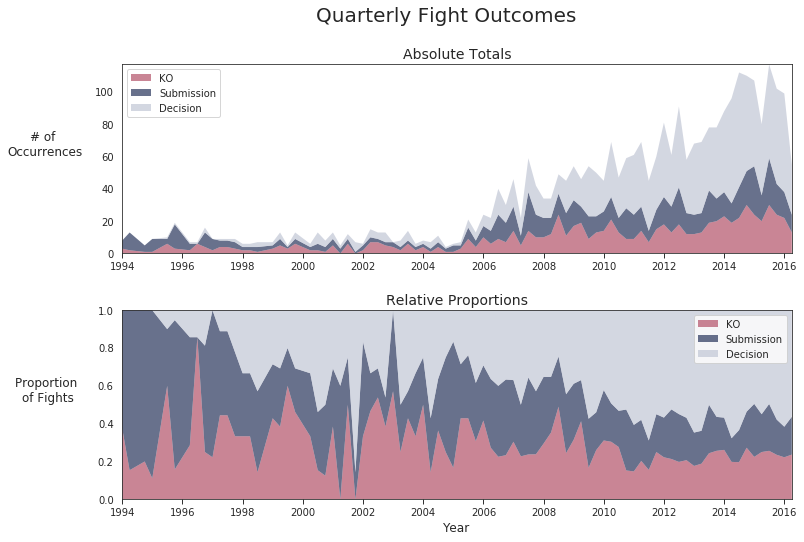

In [375]:
sns.set_style('white')

colors = ["#B35169", 
          "#28355B",
          "#C1C6D5"]
locator = mdates.YearLocator(2)

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].stackplot(tmp2.event_date, 
                tmp2.total_KO, 
                tmp2.total_Submission,
                tmp2.total_Decision, 
                labels=['KO', 'Submission', 'Decision'],
                alpha=.7, colors=colors, edgecolor=colors, lw=0, 
                baseline='zero')
ax[0].set_ylabel('# of \nOccurrences', rotation=0, labelpad=50, fontsize=12)
ax[0].legend(loc='upper left')
ax[0].set_title('Absolute Totals', fontsize=14)

ax[1].stackplot(tmp2.event_date, 
                tmp2.total_KO/tmp2.total, 
                tmp2.total_Submission/tmp2.total,
                tmp2.total_Decision/tmp2.total,
                labels=['KO', 'Submission', 'Decision'],
                alpha=.7, colors=colors, edgecolor=colors, lw=0, 
                baseline='zero')
ax[1].legend(loc='upper right')
ax[1].set_xlabel('Year', fontsize=12)
ax[1].set_title('Relative Proportions', fontsize=14)

for a in ax:
    a.margins(x=0, y=0)
    a.set_xticks(tmp2.event_date)
    a.xaxis.set_major_locator(locator)
    a.tick_params(axis='both', bottom=True, length=5, color='black')

plt.subplots_adjust(hspace=.3)
plt.ylabel('Proportion \nof Fights', rotation=0, labelpad=50, fontsize=12)
plt.suptitle('Quarterly Fight Outcomes', fontsize=20)
plt.savefig('plots/area.png', bbox_inches='tight')
plt.show()

In [ ]:
import altair as alt

In [225]:
alt.renderers.enable('notebook')
tmp3 = tmp2.copy().reset_index()
tmp3.columns = ['_'.join(pair) for pair in tmp3.columns.values]
tmp3.head(3)

,event_date_,total_Decision,total_KO,total_Submission
0,1993-12-31,0.0,3.0,5.0
1,1994-03-31,0.0,2.0,11.0
2,1994-09-30,0.0,1.0,4.0


In [226]:
! conda info --envs

# conda environments:
#
base                  *  /anaconda3
694                      /anaconda3/envs/694
MSDS603                  /anaconda3/envs/MSDS603
anomaly_app              /anaconda3/envs/anomaly_app
chatbot                  /anaconda3/envs/chatbot
deeplearning             /anaconda3/envs/deeplearning
fastai-env               /anaconda3/envs/fastai-env
ml                       /anaconda3/envs/ml
msds603                  /anaconda3/envs/msds603



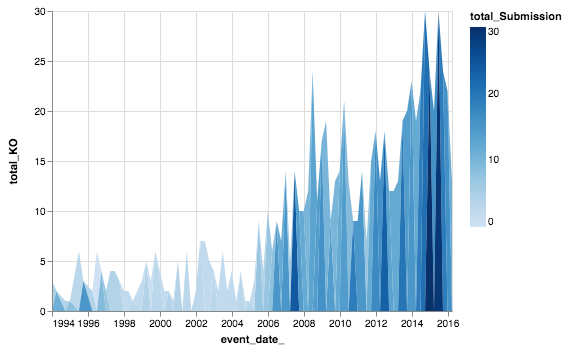

In [237]:
alt.Chart(tmp3).mark_area().encode(
    alt.X('event_date_'),
    alt.Y('total_KO'),
    alt.Color('total_Submission')
).interactive()

In [255]:
df.dropna(0, subset=['simple_method'])

,pageurl,eid,mid,event_name,event_org,event_date,event_place,f1pageurl,f2pageurl,f1name,...,time,name_1,locality_1,country_1,name_2,locality_2,country_2,month,year,simple_method
0,/events/UFC-1-The-Beginning-7,7,8,UFC 1 - The Beginning,Ultimate Fighting Championship,1993-11-12,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Gerard-Gordeau-15,Royce Gracie,...,1:44,Royce Gracie,Rio de Janeiro,Brazil,Gerard Gordeau,The Hague,Netherlands,11,1993,Submission
1,/events/UFC-1-The-Beginning-7,7,7,UFC 1 - The Beginning,Ultimate Fighting Championship,1993-11-12,"McNichols Arena, Denver, Colorado, United States",/fighter/Jason-DeLucia-22,/fighter/Trent-Jenkins-23,Jason DeLucia,...,0:52,Jason DeLucia,"Bellingham, Massachusets",United States,Trent Jenkins,"Denver, Colorado",United States,11,1993,Submission
2,/events/UFC-1-The-Beginning-7,7,6,UFC 1 - The Beginning,Ultimate Fighting Championship,1993-11-12,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Ken-Shamrock-4,Royce Gracie,...,0:57,Royce Gracie,Rio de Janeiro,Brazil,Ken Shamrock,"San Diego, California",United States,11,1993,Submission
3,/events/UFC-1-The-Beginning-7,7,5,UFC 1 - The Beginning,Ultimate Fighting Championship,1993-11-12,"McNichols Arena, Denver, Colorado, United States",/fighter/Gerard-Gordeau-15,/fighter/Kevin-Rosier-17,Gerard Gordeau,...,0:59,Gerard Gordeau,The Hague,Netherlands,Kevin Rosier,"Tampa, Florida",United States,11,1993,KO
4,/events/UFC-1-The-Beginning-7,7,4,UFC 1 - The Beginning,Ultimate Fighting Championship,1993-11-12,"McNichols Arena, Denver, Colorado, United States",/fighter/Ken-Shamrock-4,/fighter/Patrick-Smith-21,Ken Shamrock,...,1:49,Ken Shamrock,"San Diego, California",United States,Patrick Smith,"Denver, Colorado",United States,11,1993,Submission
5,/events/UFC-1-The-Beginning-7,7,3,UFC 1 - The Beginning,Ultimate Fighting Championship,1993-11-12,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Art-Jimmerson-20,Royce Gracie,...,2:18,Royce Gracie,Rio de Janeiro,Brazil,Art Jimmerson,"St. Louis, Missouri",United States,11,1993,Submission
6,/events/UFC-1-The-Beginning-7,7,2,UFC 1 - The Beginning,Ultimate Fighting Championship,1993-11-12,"McNichols Arena, Denver, Colorado, United States",/fighter/Kevin-Rosier-17,/fighter/Zane-Frazier-18,Kevin Rosier,...,4:20,Kevin Rosier,"Tampa, Florida",United States,Zane Frazier,"North Hollywood, California",United States,11,1993,KO
7,/events/UFC-1-The-Beginning-7,7,1,UFC 1 - The Beginning,Ultimate Fighting Championship,1993-11-12,"McNichols Arena, Denver, Colorado, United States",/fighter/Gerard-Gordeau-15,/fighter/Teila-Tuli-16,Gerard Gordeau,...,0:26,Gerard Gordeau,The Hague,Netherlands,Teila Tuli,"Honolulu, Hawaii",United States,11,1993,KO
8,/events/UFC-2-No-Way-Out-8,8,15,UFC 2 - No Way Out,Ultimate Fighting Championship,1994-03-11,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Royce-Gracie-19,/fighter/Patrick-Smith-21,Royce Gracie,...,1:17,Royce Gracie,Rio de Janeiro,Brazil,Patrick Smith,"Denver, Colorado",United States,3,1994,Submission
9,/events/UFC-2-No-Way-Out-8,8,14,UFC 2 - No Way Out,Ultimate Fighting Championship,1994-03-11,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Royce-Gracie-19,/fighter/Remco-Pardoel-33,Royce Gracie,...,1:31,Royce Gracie,Rio de Janeiro,Brazil,Remco Pardoel,Oss,Holland,3,1994,Submission


In [254]:
df.columns

Index(['pageurl', 'eid', 'mid', 'event_name', 'event_org', 'event_date',
       'event_place', 'f1pageurl', 'f2pageurl', 'f1name', 'f2name', 'f1result',
       'f2result', 'f1fid', 'f2fid', 'method', 'method_d', 'ref', 'round',
       'time', 'name_1', 'locality_1', 'country_1', 'name_2', 'locality_2',
       'country_2', 'month', 'year', 'simple_method'],
      dtype='object')

In [272]:
tmp4 = df[df.simple_method != 'Other'].set_index('event_date')\
         .groupby([pd.Grouper(freq='Q'), 'simple_method'])\
         .size()\
         .reset_index()\
         .rename({0: 'total'}, axis=1)
tmp4.ends()

,event_date,simple_method,total
0,1993-12-31,KO,3
1,1993-12-31,Submission,5
2,1994-03-31,KO,2
3,1994-03-31,Submission,11
4,1994-09-30,KO,1
241,2015-12-31,KO,22
242,2015-12-31,Submission,16
243,2016-03-31,Decision,31
244,2016-03-31,KO,13
245,2016-03-31,Submission,11


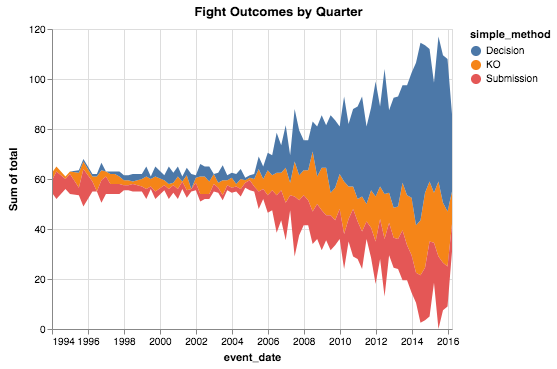

In [279]:
alt.Chart(tmp4).mark_area().encode(
    alt.X('event_date'),
    alt.Y('sum(total)', stack='center'),
    alt.Color('simple_method')
).properties(title='Fight Outcomes by Quarter').interactive()

In [238]:
from vega_datasets import data

source = data.unemployment_across_industries.url

In [239]:
source

'https://vega.github.io/vega-datasets/data/unemployment-across-industries.json'

In [392]:
df.dropna(subset=['name_1'], axis=0)[df.name_1 == 'Cody Garbrandt']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,pageurl,eid,mid,event_name,event_org,event_date,event_place,f1pageurl,f2pageurl,f1name,...,time,name_1,locality_1,country_1,name_2,locality_2,country_2,month,year,simple_method
3073,/events/UFC-182-Jones-vs-Cormier-38841,38841,5,UFC 182 - Jones vs. Cormier,Ultimate Fighting Championship,2015-01-03,"MGM Grand Garden Arena, Las Vegas, Nevada, Uni...",/fighter/Cody-Garbrandt-50381,/fighter/Marcus-Brimage-21618,Cody Garbrandt,...,4:50,Cody Garbrandt,"Uhrichsville, Ohio",United States,Marcus Brimage,"Birmingham, Alabama",United States,1,2015,KO
3312,/events/UFC-189-Mendes-vs-McGregor-42211,42211,3,UFC 189 - Mendes vs. McGregor,Ultimate Fighting Championship,2015-07-11,"MGM Grand Garden Arena, Las Vegas, Nevada, Uni...",/fighter/Cody-Garbrandt-50381,/fighter/Enrique-Briones-20939,Cody Garbrandt,...,5:00,Cody Garbrandt,"Uhrichsville, Ohio",United States,Enrique Briones,"Tijuana, Baja California",Mexico,7,2015,Decision
3593,/events/UFC-Fight-Night-83-Cerrone-vs-Oliveira...,47935,11,UFC Fight Night 83 - Cerrone vs. Oliveira,Ultimate Fighting Championship,2016-02-21,"Consol Energy Center, Pittsburgh, Pennsylvania...",/fighter/Cody-Garbrandt-50381,/fighter/Augusto-Mendes-160663,Cody Garbrandt,...,4:18,Cody Garbrandt,"Uhrichsville, Ohio",United States,Augusto Mendes,"Rio de Janeiro, Rio de Janeiro",Brazil,2,2016,NaN


## Fights

In [395]:
!ls data

country_lat_lon.csv fights_merged.csv   lat_lon.csv         sherdog.csv
country_wins.csv    final.csv           merged.csv          stream_tmp.csv
fights.csv          index.csv           scrape.csv          wc_groups.csv


In [414]:
df = pd.read_csv('data/final.csv')
df.head()

,d,l,nc,w,association,country,dob,fname,height1,height2,...,z_eff,z_active,z_grind,z_st_ratio,z_age,z_ape_ratio,fights,fstyle,z_reach,weightclass
0,0,4,0.0,13,The Kennel Fight Club,USA,1989-09-22,Corey,75.0,75.0,...,0.167906,0.081024,NaN,-0.457772,-1.288641,0.907691,17.0,grappler,1.167867,Light Heavyweight
1,0,4,0.0,18,Jackson-Wink MMA,USA,1984-09-20,Quinn,75.0,75.0,...,-0.279619,-0.803921,NaN,-0.349774,-0.194782,-0.379793,22.0,balanced,1.874822,Lightweight
2,0,3,0.0,20,Wand Fight Team,USA,1969-10-31,Jason,66.0,66.0,...,-1.198965,-0.650687,NaN,-0.764141,3.390778,NaN,23.0,grappler,NaN,Bantamweight
3,0,10,0.0,25,Jackson-Wink MMA,USA,1983-11-02,Cub,68.0,67.0,...,0.350860,0.413120,-0.037236,0.221146,0.420552,0.280248,35.0,striker,-0.089636,Featherweight
4,0,1,0.0,7,HIT Squad,USA,1980-02-12,Jon,72.0,72.0,...,0.777242,-0.601901,NaN,-0.191515,-0.132146,-1.238180,8.0,balanced,-1.776495,Heavyweight


In [421]:
df.groupby('country').weight1.mean()

country
Afghanistan                  170.000000
Argentina                    153.333333
Armenia                      176.500000
Australia                    175.000000
Austria                      230.000000
Belarus                      222.500000
Belgium                      170.000000
Bolivia                      125.000000
Bosnia and Herzegovina       245.000000
Brazil                       171.666667
Bulgaria                     195.000000
Canada                       170.136364
Chile                        145.000000
China                        150.000000
Colombia                     135.000000
Croatia                      205.000000
Cuba                         165.000000
Czech Republic               212.500000
Denmark                      170.000000
Ecuador                      135.000000
El Salvador                  157.500000
England                      174.800000
Finland                      143.000000
France                       187.000000
Germany                      155

In [400]:
fights = pd.read_csv('data/fights.csv')
fights.head()

,pageurl,eid,mid,event_name,event_org,event_date,event_place,f1pageurl,f2pageurl,f1name,f2name,f1result,f2result,f1fid,f2fid,method,method_d,ref,round,time
0,/events/UFC-1-The-Beginning-7,7,8,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Gerard-Gordeau-15,Royce Gracie,Gerard Gordeau,win,loss,19,15,Submission,Rear-Naked Choke,Helio Vigio,1,1:44
1,/events/UFC-1-The-Beginning-7,7,7,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Jason-DeLucia-22,/fighter/Trent-Jenkins-23,Jason DeLucia,Trent Jenkins,win,loss,22,23,Submission,Rear-Naked Choke,Joao Alberto Barreto,1,0:52
2,/events/UFC-1-The-Beginning-7,7,6,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Ken-Shamrock-4,Royce Gracie,Ken Shamrock,win,loss,19,4,Submission,Rear-Naked Choke,Helio Vigio,1,0:57
3,/events/UFC-1-The-Beginning-7,7,5,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Gerard-Gordeau-15,/fighter/Kevin-Rosier-17,Gerard Gordeau,Kevin Rosier,win,loss,15,17,TKO,Corner Stoppage,Joao Alberto Barreto,1,0:59
4,/events/UFC-1-The-Beginning-7,7,4,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Ken-Shamrock-4,/fighter/Patrick-Smith-21,Ken Shamrock,Patrick Smith,win,loss,4,21,Submission,Heel Hook,Helio Vigio,1,1:49


In [464]:
fights.location.value_counts()

 Las Vegas,  Nevada,  United States               968
 Montreal,  Quebec,  Canada                        81
 Newark,  New Jersey,  United States               78
 Atlantic City,  New Jersey,  United States        69
 Anaheim,  California,  United States              60
 London,  England,  England                        59
 Rio de Janeiro,  Brazil,  Brazil                  58
 Toronto,  Ontario,  Canada                        49
 Boston,  Massachusetts,  United States            48
 Stockholm,  Sweden,  Sweden                       48
 San Jose,  California,  United States             47
 Houston,  Texas,  United States                   45
 Chicago,  Illinois,  United States                44
 Sydney,  New South Wales,  Australia              43
 Denver,  Colorado,  United States                 43
 Los Angeles,  California,  United States          41
 Dallas,  Texas,  United States                    38
 Sacramento,  California,  United States           37
 Seattle,  Washington,  Unit

In [446]:
fights.event_place.str.split(',')

0       [McNichols Arena,  Denver,  Colorado,  United ...
1       [McNichols Arena,  Denver,  Colorado,  United ...
2       [McNichols Arena,  Denver,  Colorado,  United ...
3       [McNichols Arena,  Denver,  Colorado,  United ...
4       [McNichols Arena,  Denver,  Colorado,  United ...
5       [McNichols Arena,  Denver,  Colorado,  United ...
6       [McNichols Arena,  Denver,  Colorado,  United ...
7       [McNichols Arena,  Denver,  Colorado,  United ...
8       [Fillmore Auditorium,  Denver,  Colorado,  Uni...
9       [Fillmore Auditorium,  Denver,  Colorado,  Uni...
10      [Fillmore Auditorium,  Denver,  Colorado,  Uni...
11      [Fillmore Auditorium,  Denver,  Colorado,  Uni...
12      [Fillmore Auditorium,  Denver,  Colorado,  Uni...
13      [Fillmore Auditorium,  Denver,  Colorado,  Uni...
14      [Fillmore Auditorium,  Denver,  Colorado,  Uni...
15      [Fillmore Auditorium,  Denver,  Colorado,  Uni...
16      [Fillmore Auditorium,  Denver,  Colorado,  Uni...
17      [Fillm

In [444]:
b

(' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Denver',
 ' Charlotte',
 ' Charlotte',
 ' Charlotte',
 ' Charlotte',
 ' Charlotte',
 ' Charlotte',
 ' Tulsa',
 ' Tulsa',
 ' Tulsa',
 ' Tulsa',
 ' Tulsa',
 ' Tulsa',
 ' Tulsa',
 ' Tulsa',
 ' Tulsa',
 ' Tulsa',
 ' Charlotte',
 ' Charlotte',
 ' Charlotte',
 ' Charlotte',
 ' Charlotte',
 ' Charlotte',
 ' Charlotte',
 ' Charlotte',
 ' Charlotte',
 ' Charlotte',
 ' Casper',
 ' Casper',
 ' Casper',
 ' Casper',
 ' Casper',
 ' Casper',
 ' Casper',
 ' Casper',
 ' Casper',
 ' Casper',
 ' Buffalo',
 ' Buffalo',
 ' Buffalo',
 ' Buffalo',
 ' Buffalo',
 ' Buffalo',
 ' Buffalo',
 ' Buffalo',
 ' Buffalo',
 ' Buffalo',
 ' Buffalo',
 ' San Juan',
 ' San Juan',
 ' San Juan',
 ' San Juan',
 ' San Juan',
 ' San Juan',
 ' San Juan',
 ' San Juan',